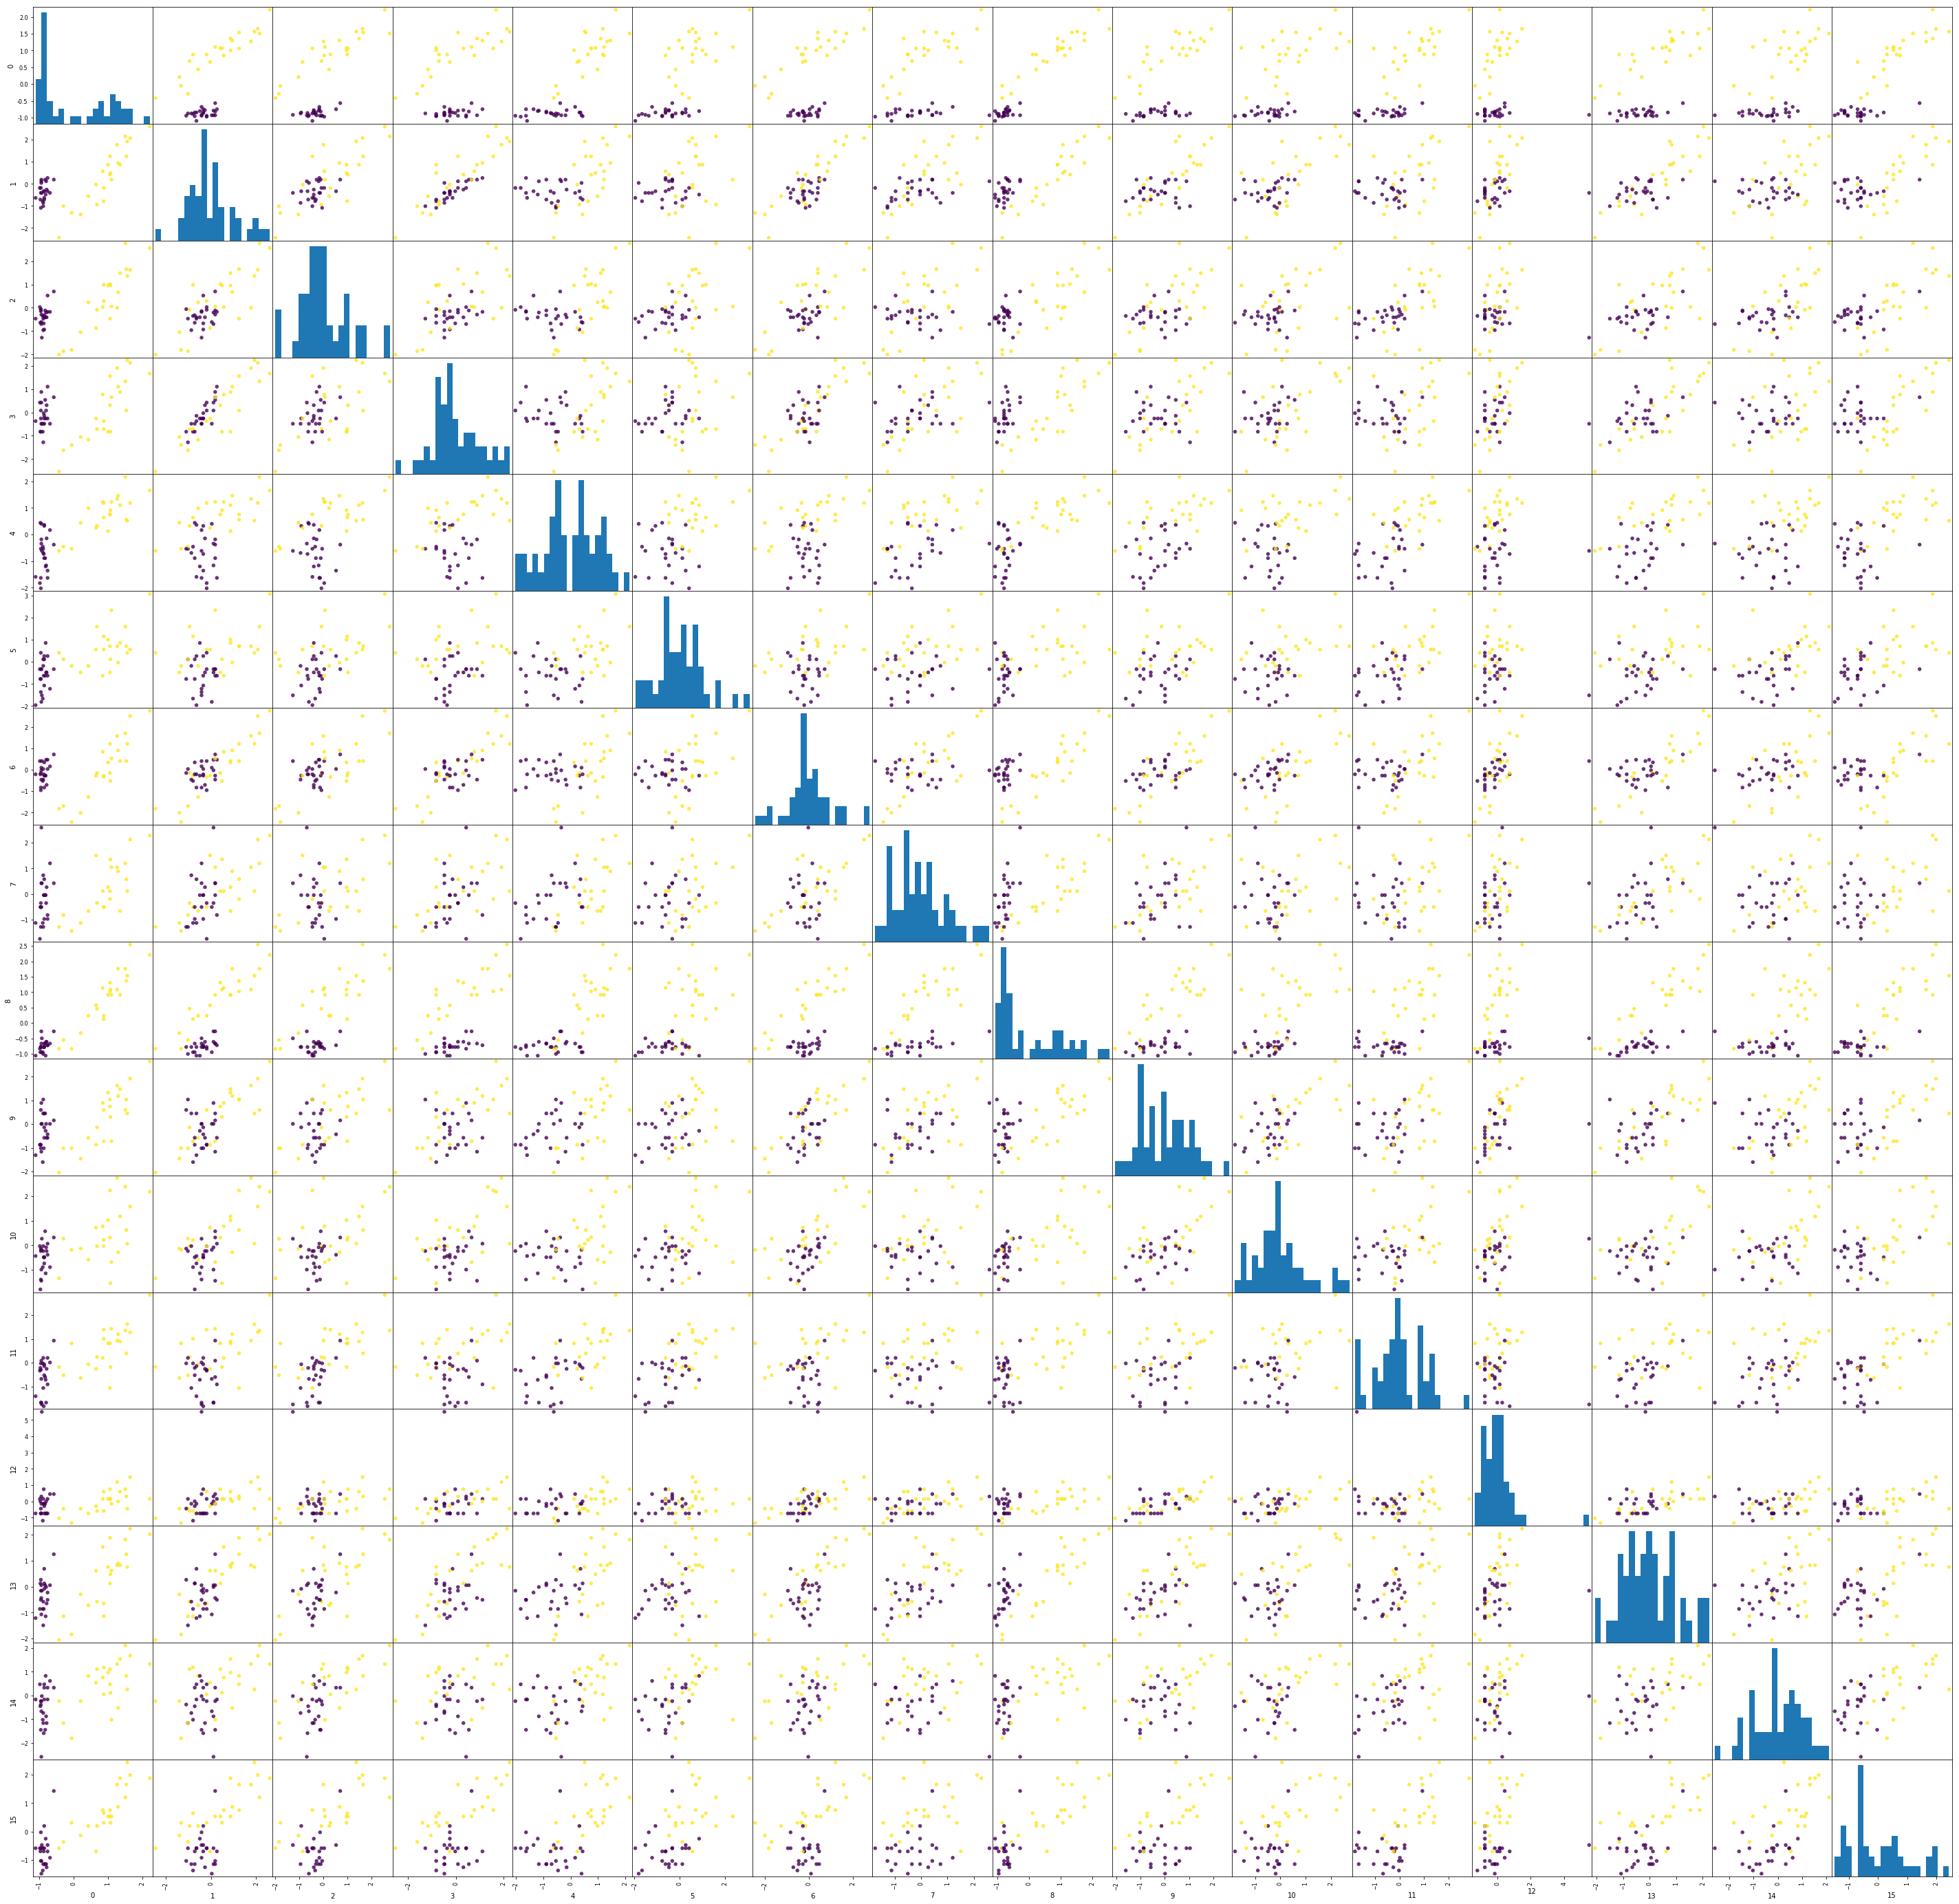

In [2]:
import numpy as np
data = np.loadtxt('ВN_01.csv', delimiter=';', unpack=False)

s = 'all' #без выбросов
X = data[:, :16]
y = data[:, 16:17]
y = y.reshape(64)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Нормализация (стандартизация данных)
# вычисляем среднее для каждого признака обучающего набора
mean_on_train = X_train.mean(axis = 0)
# вычисляем стандартное отклонение для каждого признака обучающего набора
std_on_train = X_train.std(axis = 0)
# вычисляем среднее и затем умножаем на обратную величину обратного стандартного отклонения mean=0 и std = 1
X_train_scaled = (X_train - mean_on_train)/std_on_train
# используем ТО ЖЕ САМОЕ преобразование (используем среднее и стандартное отклонение обучающего набора) для тестового набора
X_test_scaled = (X_test - mean_on_train)/std_on_train


import pandas as pd
from pandas import plotting 
import matplotlib.pyplot as plt
%matplotlib inline

dataframe = pd.DataFrame(X)
dataframe = pd.DataFrame(X_train_scaled)
grr = plotting.scatter_matrix(dataframe, c=y_train, figsize=(50, 50), marker='o', hist_kwds={'bins': 20}, s=30, alpha=.8)
#plt.savefig("figure_"+s+".png")

#data_pd = pd.DataFrame(np.array(X_test_scaled))
#data_pd.columns = params
#display(data_pd)

C = 0.007
coef_l1:[[ 0.04066063  0.         -0.00618647  0.          0.          0.
   0.          0.          0.          0.          0.         -0.01549944
   0.          0.          0.          0.        ]]
intercept_:[0.]
score train: 97.92%
score test: 93.75%

C = 0.007
coef_l2:[[ 0.09216849 -0.01603858 -0.04028049 -0.0180226   0.00650109  0.00521589
  -0.03068496 -0.00899658  0.01354461 -0.01011325 -0.00639413 -0.00314006
  -0.00698036 -0.01657687 -0.00773262  0.00551624]]

intercept_:[-0.00011602]
score train: 100.00%
score test: 100.00%



Text(0.5, 1.0, 'Logistic regression')

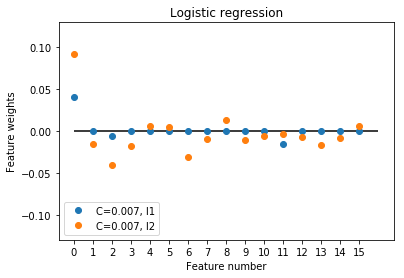

In [4]:
import matplotlib.pyplot as plt
# дискретная бинарная классификация
# логистическая регрессия

from sklearn.linear_model import LogisticRegression
C = 0.007
print("C = 0.007")
l1 = LogisticRegression(C = C, solver='liblinear', penalty='l1')
l1.fit(X_train,y_train)
print("coef_l1:{}".format(l1.coef_))
print("intercept_:{}".format(l1.intercept_))
print("score train: {:.2f}%".format(l1.score(X_train, y_train)*100))
print("score test: {:.2f}%\n".format(l1.score(X_test, y_test)*100))

print("C = 0.007")
lr_l2 = LogisticRegression(C = C, solver='liblinear', penalty='l2')
lr_l2.fit(X_train,y_train)
print("coef_l2:{}\n".format(lr_l2.coef_))
print("intercept_:{}".format(lr_l2.intercept_))
print("score train: {:.2f}%".format(lr_l2.score(X_train, y_train)*100))
print("score test: {:.2f}%\n".format(lr_l2.score(X_test, y_test)*100))

plt.plot(l1.coef_.T, 'o', label="C={:.3f}, l1".format(C))
plt.plot(lr_l2.coef_.T, 'o', label="C={:.3f}, l2".format(C))
plt.xticks(range(16))
plt.hlines(0, 0, 16)
plt.xlabel("Feature number")
plt.ylabel("Feature weights")
plt.ylim(-0.13, 0.13)
plt.legend(loc=3)
plt.title("Logistic regression")

# plt.savefig("Logistic_regression_"+s+".png")


linear_svm_l1.coef_:  [[ 0.0222545   0.         -0.01421624  0.          0.          0.
   0.          0.          0.          0.         -0.00501938 -0.00023489
   0.          0.          0.          0.        ]]
linear_svm_l1.intercept_:  [0.]
linear_svm_l1.score train: 100.00%

linear_svm_l1.score test: 100.00%

linear_svm_l2.coef_:  [[ 0.02551268 -0.00362666 -0.01375475 -0.00583587  0.00092989  0.00169749
  -0.01034086 -0.0039717   0.00303193 -0.00434082  0.00055883  0.00050309
  -0.00109262 -0.00542118 -0.00328579  0.00162551]]
linear_svm_l2.intercept_:  [-2.27279997e-05]
linear_svm_l2.score train: 100.00%

linear_svm_l2.score test: 100.00%



Text(0.5, 1.0, 'LinearSVC')

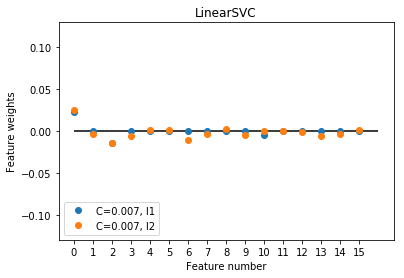

In [6]:
# линейный метод опорных векторов
from sklearn.svm import LinearSVC

linear_svm_l1 = LinearSVC(C = 0.01, penalty="l1", dual=False)
linear_svm_l1.fit(X_train,y_train)
print("linear_svm_l1.coef_: ", linear_svm_l1.coef_)
print("linear_svm_l1.intercept_: ", linear_svm_l1.intercept_)
print("linear_svm_l1.score train: {:.2f}%\n".format(linear_svm_l1.score(X_train, y_train)*100))
print("linear_svm_l1.score test: {:.2f}%\n".format(linear_svm_l1.score(X_test, y_test)*100))

linear_svm_l2 = LinearSVC(C = 0.01, penalty="l2", dual=False)
linear_svm_l2.fit(X_train,y_train)
print("linear_svm_l2.coef_: ", linear_svm_l2.coef_)
print("linear_svm_l2.intercept_: ", linear_svm_l2.intercept_)
print("linear_svm_l2.score train: {:.2f}%\n".format(linear_svm_l2.score(X_train, y_train)*100))
print("linear_svm_l2.score test: {:.2f}%\n".format(linear_svm_l2.score(X_test, y_test)*100))

plt.plot(linear_svm_l1.coef_.T, 'o', label="C={:.3f}, l1".format(C))
plt.plot(linear_svm_l2.coef_.T, 'o', label="C={:.3f}, l2".format(C))
plt.xticks(range(16))
plt.hlines(0, 0, 16)
plt.xlabel("Feature number")
plt.ylabel("Feature weights")
plt.ylim(-0.13, 0.13)
plt.legend(loc=3)
plt.title("LinearSVC")

# plt.savefig("LinearSVC_"+s+".png")

In [11]:
plt.figure(figsize=(10,10))
plt.plot(lr_l1.coef_.T, 'o', label="C={:.3f}, lr_l1".format(C))
plt.plot(lr_l2.coef_.T, 'o', label="C={:.3f}, lr_l2".format(C))
plt.plot(linear_svm_l1.coef_.T, '^', label="C={:.3f}, l_svm_l1".format(C))
plt.plot(linear_svm_l2.coef_.T, '^', label="C={:.3f}, l_svm_l2".format(C))
plt.xticks(range(16))
plt.hlines(0, 0, 16)
plt.xlabel("Feature number")
plt.ylabel("Feature weights")
plt.ylim(-0.13, 0.13)
plt.legend(loc=3)
# plt.savefig("features_weights_"+s+".png")

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

<Figure size 720x720 with 0 Axes>

In [12]:
print("lr_l1 features != 0: {}\n".format(np.where((lr_l1.coef_!=0))[1]))
print("linear_svm_l1 features != 0: {}\n".format(np.where((linear_svm_l1.coef_!=0))[1]))

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

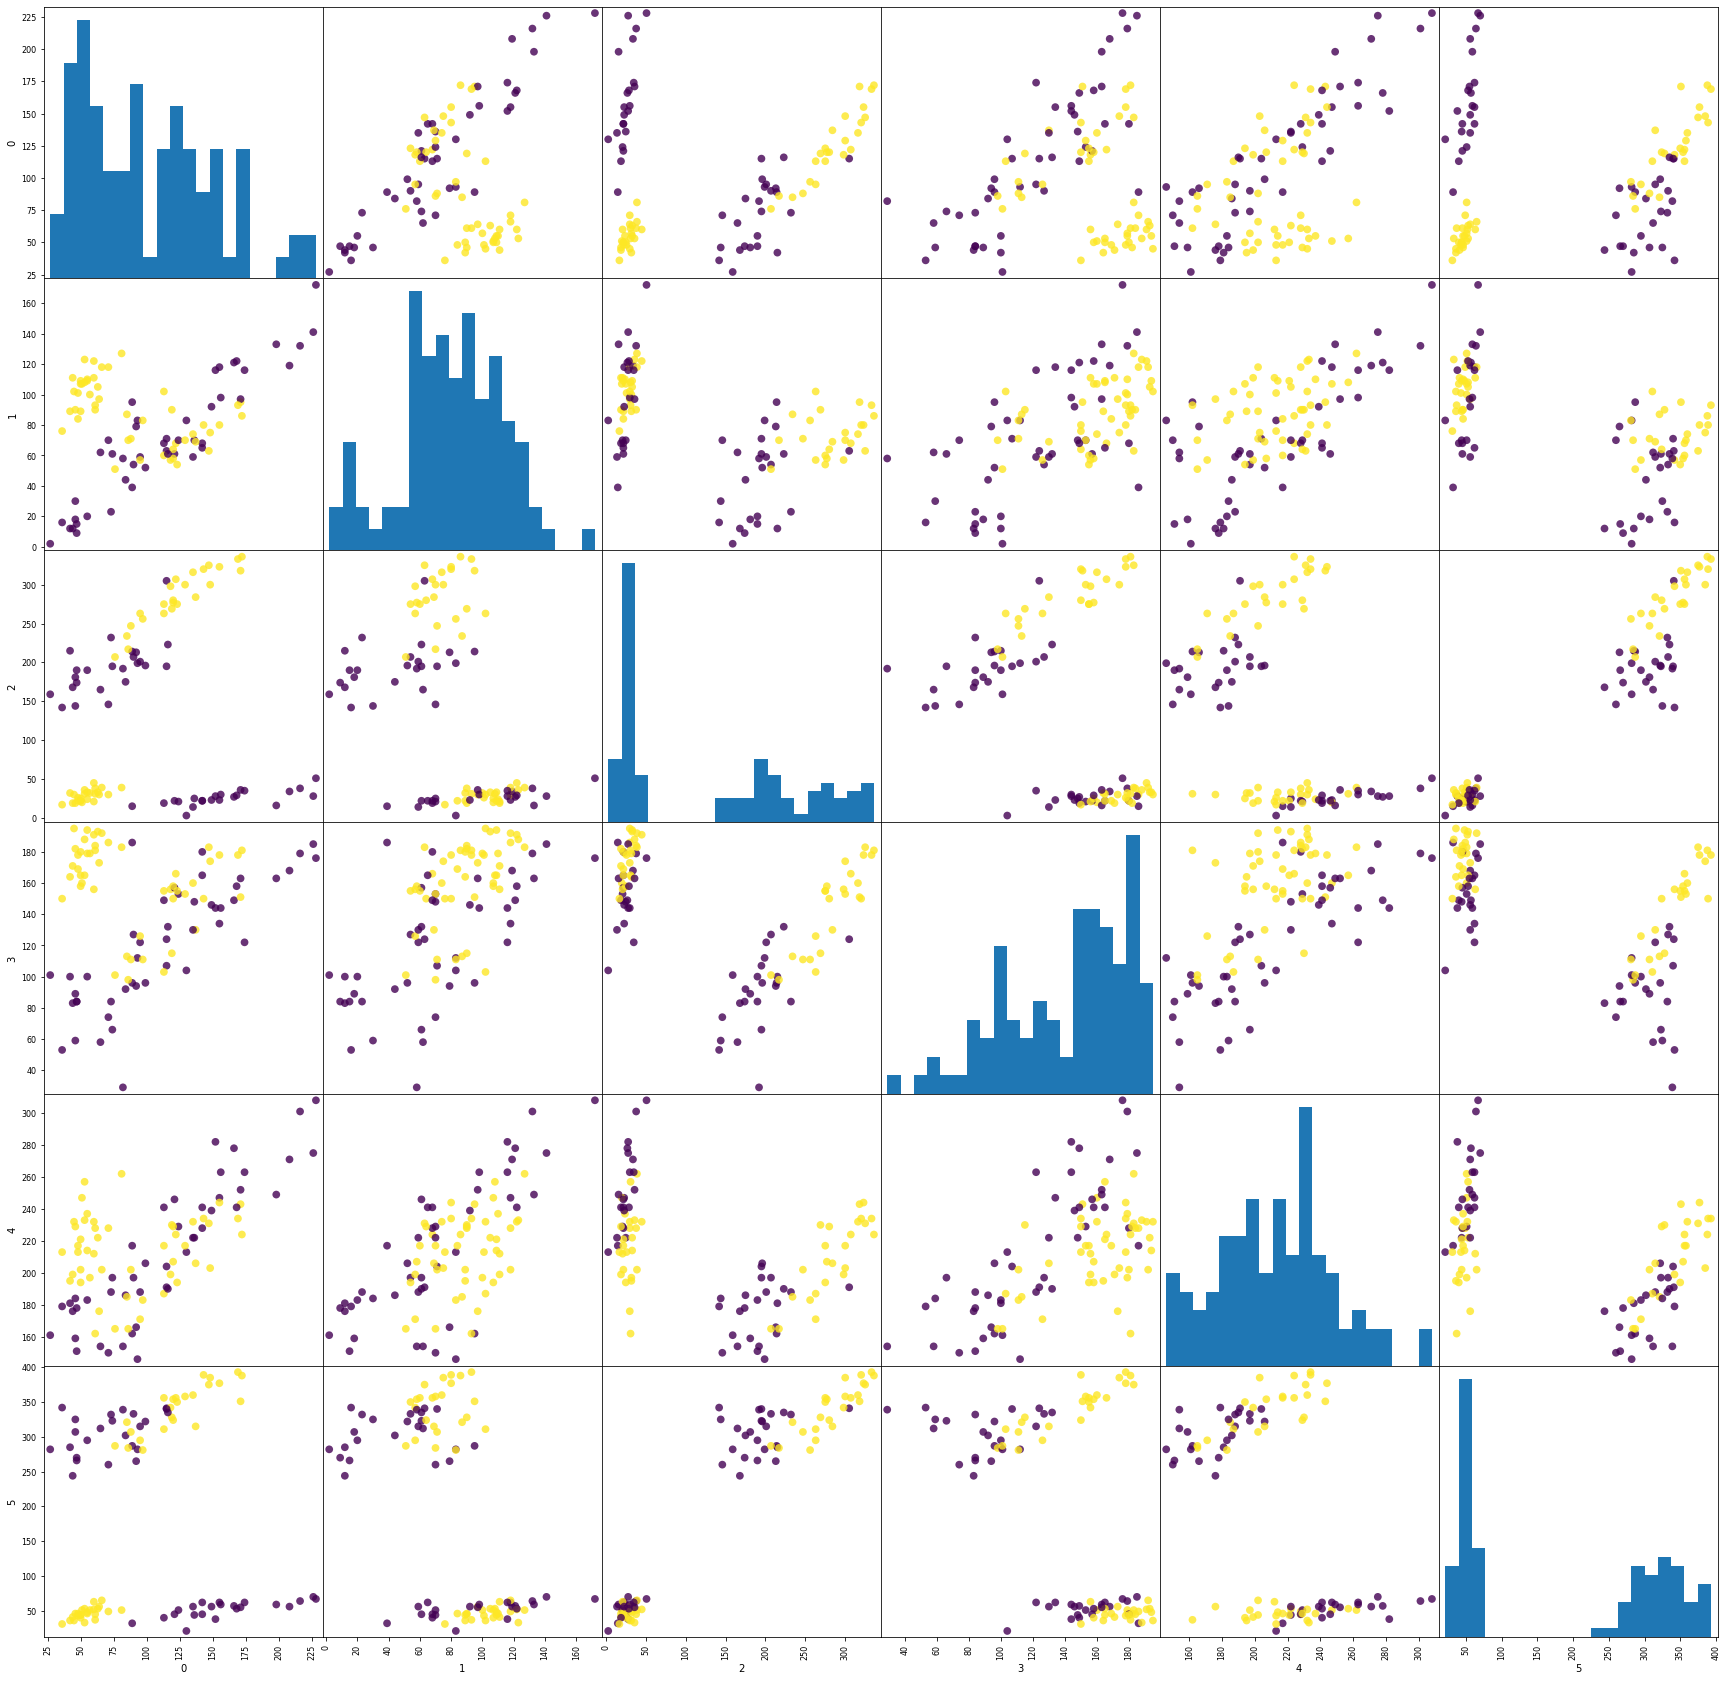

In [100]:
X_lr_l1_features = X_train[:, np.where((lr_l1.coef_!=0))[1]]
# print(X_lr_l1_features)
dataframe = pd.DataFrame(X_lr_l1_features)
grr = plotting.scatter_matrix(dataframe, c=y_train, figsize=(30, 30), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
# plt.savefig("X_lr_l1_features_"+s+".png")

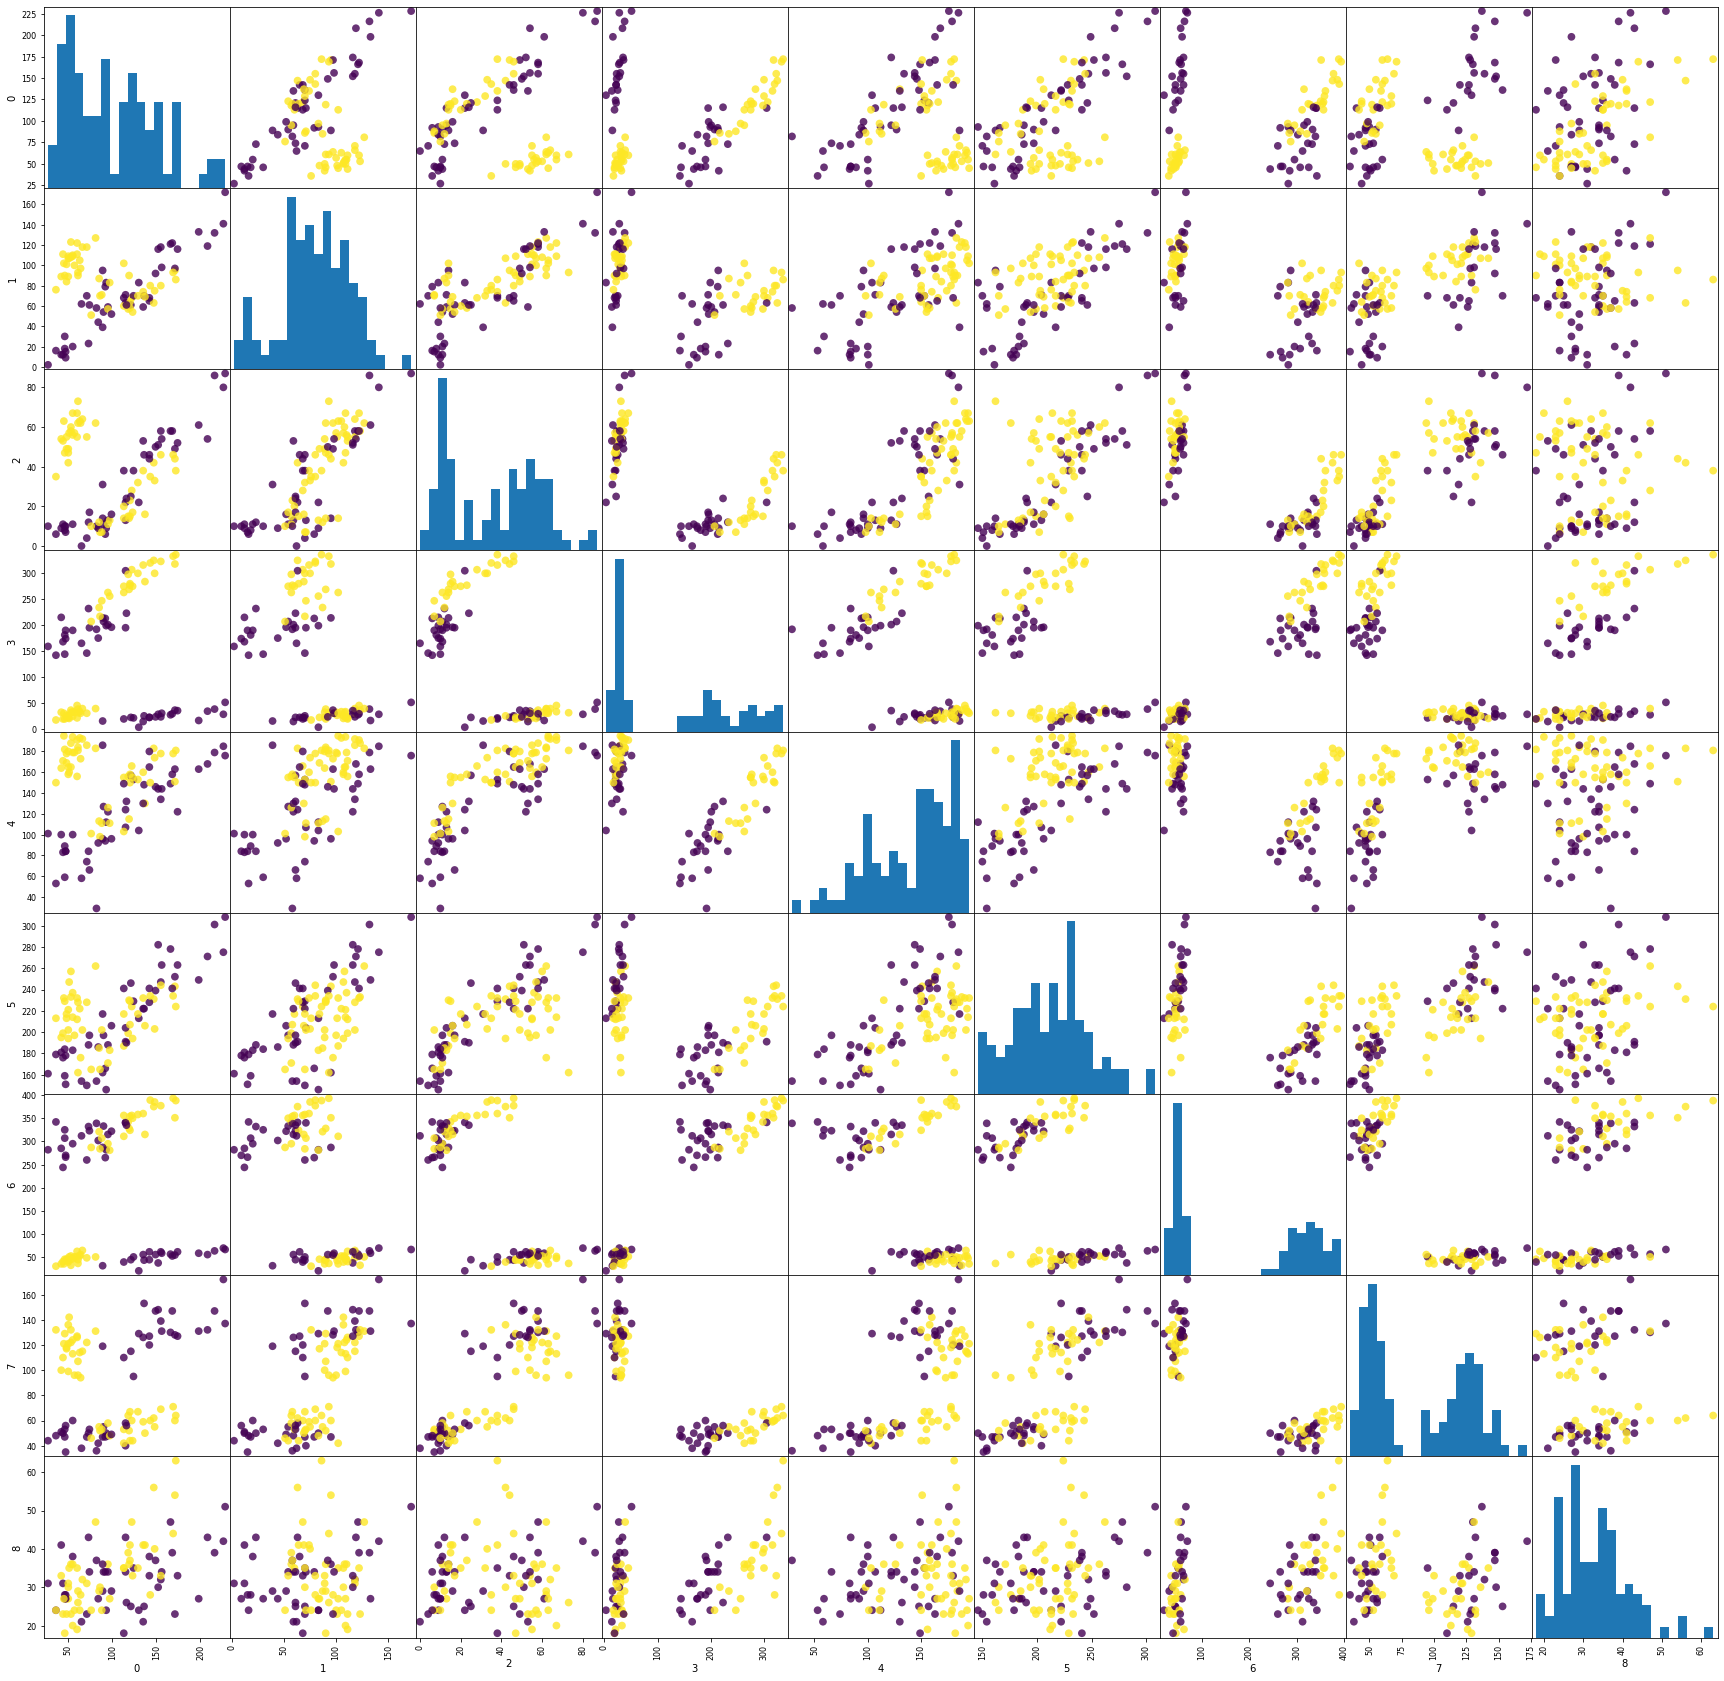

In [101]:
X_linear_svm_l1_features = X_train[:, np.where((linear_svm_l1.coef_!=0))[1]]
# print(X_lr_l1_features)
dataframe = pd.DataFrame(X_linear_svm_l1_features)
grr = plotting.scatter_matrix(dataframe, c=y_train, figsize=(30, 30), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
# plt.savefig("X_linear_svm_l1_features_"+s+".png")

In [113]:
# дерево решений

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
print("dt.score train: {:.2f}%\n".format(dt.score(X_train, y_train)*100))
print("dt.score test: {:.2f}%\n".format(dt.score(X_test, y_test)*100))
print("dt.feature_importances_ : \n{}\n".format(dt.feature_importances_))
dotfile = open("dtree2.dot", 'w')
export_graphviz(dt, out_file = dotfile)
dotfile.close()
# dt1 = DecisionTreeClassifier(random_state = 42, max_depth=5)
# dt1.fit(X_train, y_train)
# print("dt1.score train: {:.2f}%\n".format(dt1.score(X_train, y_train)*100))
# print("dt1.score test: {:.2f}%\n".format(dt1.score(X_test, y_test)*100))
# print("dt1.feature_importances_ : \n{}\n".format(dt1.feature_importances_))


dt.score train: 100.00%

dt.score test: 90.62%

dt.feature_importances_ : 
[0.0280982  0.09726299 0.         0.         0.         0.
 0.         0.         0.21181717 0.23876572 0.31101615 0.00942768
 0.         0.         0.03161047 0.07200163]



In [122]:
# случайный лес
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=8, random_state=42)
forest.fit(X_train, y_train)
print("forest.score train: {:.2f}%\n".format(forest.score(X_train, y_train)*100))
print("forest.score test: {:.2f}%\n".format(forest.score(X_test, y_test)*100))
print(forest)


forest.score train: 100.00%

forest.score test: 93.75%

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [130]:
# градиентный бустинг 

from sklearn.ensemble import GradientBoostingClassifier
boosting = GradientBoostingClassifier(random_state = 42, n_estimators=20)
boosting.fit(X_train, y_train)
print("boosting.score train: {:.2f}%".format(boosting.score(X_train, y_train)*100))
print("boosting.score test: {:.2f}%\n".format(boosting.score(X_test, y_test)*100))
print(boosting.feature_importances_)

boosting.score train: 100.00%
boosting.score test: 93.75%

[0.00983401 0.03385362 0.02850642 0.00591472 0.01608571 0.
 0.00583879 0.         0.21339304 0.25092268 0.32050353 0.0041626
 0.01299018 0.05157281 0.03499869 0.0114232 ]


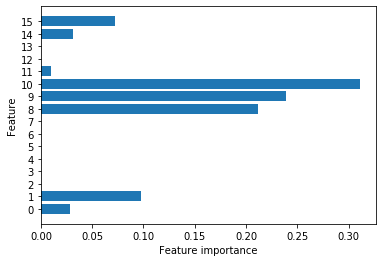

In [131]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = 16
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), np.arange(16))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(dt)   


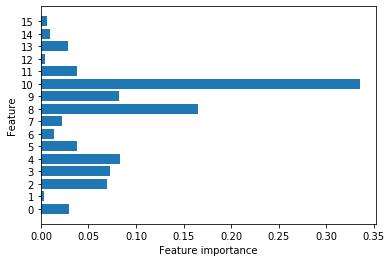

In [134]:
plot_feature_importances(forest) 

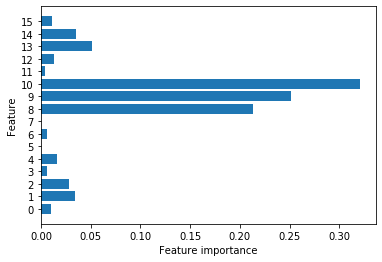

In [133]:
plot_feature_importances(boosting)

In [145]:
lr_l1_features = np.where(lr_l1.coef_!=0)[1]
linear_svm_l1_features = np.where(linear_svm_l1.coef_!=0)[1]
dt_features = np.where(dt.feature_importances_!=0)
boosting_features = np.where(boosting.feature_importances_!=0)

print("lr_l1 features != 0: {}\n".format(lr_l1_features))
print("linear_svm_l1 features != 0: {}\n".format(linear_svm_l1_features))
print("dt features != 0: {}\n".format(dt_features))
print("boosting features != 0: {}\n".format(boosting_features))

lr_l1 features != 0: [ 0  2  9 10 11 13]

linear_svm_l1 features != 0: [ 0  2  6  9 10 11 13 14 15]

dt features != 0: (array([ 0,  1,  8,  9, 10, 11, 14, 15]),)

boosting features != 0: (array([ 0,  1,  2,  3,  4,  6,  8,  9, 10, 11, 12, 13, 14, 15]),)



In [153]:
counts = {}
for label in np.arange(16):                        
    counts[label] = (lr_l1_features == label).sum() + (linear_svm_l1_features == label).sum() + (dt_features == label).sum() + (boosting_features == label).sum()
    
print(counts)
print()
for w in sorted(counts, key=counts.get, reverse = True):
    print(w, ':', counts[w])

{0: 4, 1: 2, 2: 3, 3: 1, 4: 1, 5: 0, 6: 2, 7: 0, 8: 2, 9: 4, 10: 4, 11: 4, 12: 1, 13: 3, 14: 3, 15: 3}

0 : 4
9 : 4
10 : 4
11 : 4
2 : 3
13 : 3
14 : 3
15 : 3
1 : 2
6 : 2
8 : 2
3 : 1
4 : 1
12 : 1
5 : 0
7 : 0
